In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

### The single most important equation in linear systems

$$\mathbf{y} = \mathbf{A}\mathbf{x}$$

### Or

$$\mathbf{Y} = \mathbf{A}\mathbf{X}$$

$$\mathbf{y} = \mathbf{A}\mathbf{x}$$

### Where $\mathbf{x}$ is the input, $\mathbf{y}$ is the output, or observations, and $\mathbf{A}$ is a matrix of coefficients.

--------------
# Linear System of Equations

### Question: Why does it take two points to define a line?

2 7
6 6


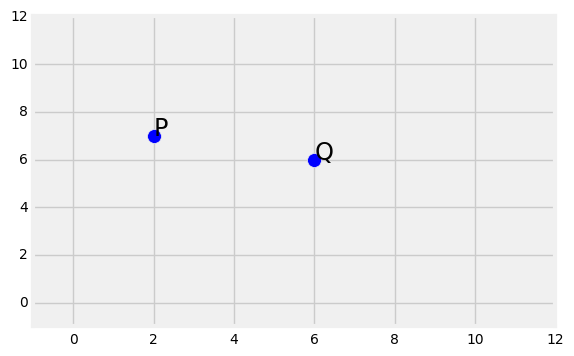

In [9]:
# pick any two points, at random, between 0 and 10

# First point - P
px, py = np.random.randint(0, high=11, size=(2,))


# Second point - Q
qx, qy = np.random.randint(0, high=11, size=(2,))

fig, ax = plt.subplots()
ax.scatter([px, qx], [py, qy], s=100)
ax.annotate('P', [px, py], fontsize='xx-large')
ax.annotate('Q', [qx, qy], fontsize='xx-large')
ax.axis([-1, 12, -1, 12])
ax.set_aspect('auto')

### Assume that the two points are joined by a line
$$y = mx + c$$
### i.e.
$$p_{y} = mp_{x} + c$$
### and
$$q_{y} = mq_{x} + c$$


### Exercise: Arrange the equations above in the form

$$\mathbf{d} = \mathbf{A}\mathbf{b}$$

### What are $\mathbf{A}$, $\mathbf{b}$ and $\mathbf{d}$?
$$d = \left[ \begin{array}{ccc} p_{y} \\ q_{y} \\ \end{array} \right]$$

$$A = \left[ \begin{array}{ccc} 1 & p_{x} \\ 1 & q_{x} \\ \end{array} \right]$$

$$b = \left[ \begin{array}{ccc} c \\ m \\ \end{array} \right]$$




In [16]:
#np.linalg.solve?

### Exercise: Construct the matrices $\mathbf{A}$, $\mathbf{b}$ and $\mathbf{c}$ with NumPy and solve for the slope and the intercept of the line


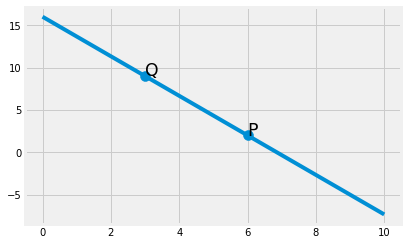

In [15]:
### Put the slope in the variable `m` and the intercept in a variable `c`.
### Then run the next cell to check your solution
### Constructing the matrices for point Q and P given in the above cells
###2
px, py = np.random.randint(0, high=11, size=(2,))
qx, qy = np.random.randint(0, high=11, size=(2,))
A = np.array([[1,px], [1,qx]])

d = np.array([py, qy]).T
line_para = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(d)
#slope
m = [line_para[1]]
#intercept
c = [line_para[0]]

# Slope of the 

xx = np.linspace(0, 10, 100)
yy = m * xx + c
fig, ax = plt.subplots()
ax.scatter([px, qx], [py, qy], s=100)
ax.annotate('P', [px, py], fontsize='xx-large')
ax.annotate('Q', [qx, qy], fontsize='xx-large')
ax.plot(xx, yy)

# What you just solved was a trivial form of linear regression!
-----------------

# Types of Linear Systems

* ## Ideal System
  - ### number of equations = number of unknowns
  - ### Unique solutions

* ## Underdetermined System:
  - ### number of equations < number of unknowns
  - ### Infinitely many solutions! (Or no solution)

* ## Overdetermined systems:
  - ### number of equations > number of unknowns
  - ### No unique solutions

# Application: Linear Regression
## We want to fit a straight line through the following dataset:

      Gender     Height      Weight
0       Male  73.847017  241.893563
1       Male  68.781904  162.310473
2       Male  74.110105  212.740856
3       Male  71.730978  220.042470
4       Male  69.881796  206.349801
5       Male  67.253016  152.212156
6       Male  68.785081  183.927889
7       Male  68.348516  167.971110
8       Male  67.018950  175.929440
9       Male  63.456494  156.399676
10      Male  71.195382  186.604926
11      Male  71.640805  213.741169
12      Male  64.766329  167.127461
13      Male  69.283070  189.446181
14      Male  69.243732  186.434168
15      Male  67.645620  172.186930
16      Male  72.418317  196.028506
17      Male  63.974326  172.883470
18      Male  69.640060  185.983958
19      Male  67.936005  182.426648
20      Male  67.915050  174.115929
21      Male  69.439440  197.731422
22      Male  66.149132  149.173566
23      Male  75.205974  228.761781
24      Male  67.893196  162.006652
25      Male  68.144033  192.343977
26      Male  69.089631  184

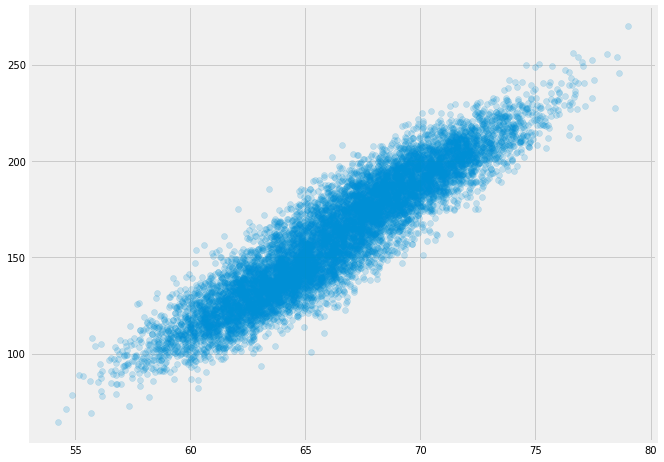

In [17]:
import pandas as pd
df = pd.read_csv('data/hwg.csv')
print (df)
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(df['Height'], df['Weight'], alpha=0.2)

### Question: What type of a system of equations is this? Ideal, underdetermined or overdetermined?

### Each y-coordinate, $y_{i}$ can be defined as:
### $$y_{i} = x_{i}\beta + \epsilon$$

## Ordinary Least Squares solution
### Optimal solution: Find the $\beta$ which minimizes:

### $$S(\beta) = \|\mathbf{y} -\mathbf{x}\beta\|^2$$

### The optimal $\beta$ is:
### $$\hat{\beta} = (\mathbf{x}^{T}\mathbf{x})^{-1}\mathbf{x}^{T}\mathbf{y}$$

In [ ]:
np.transpose?

In [ ]:
np.linalg.inv?

In [ ]:
np.dot?

In [ ]:
X = np.c_[np.ones((df.shape[0],)), df['Height'].values]
Y = df['Weight'].values.reshape(-1, 1)

### Exercise: use the formula above to find the optimal beta, given the X and Y as defined.
### Place your solution in a variable named `beta`,
### then run the cell below to check your solution

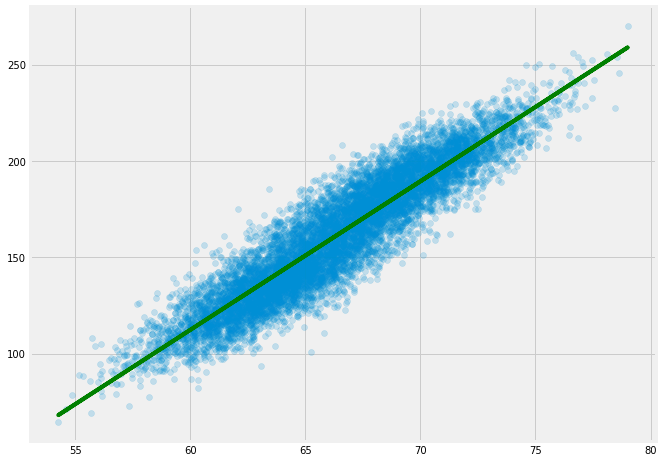

In [21]:
# enter code here
X = np.c_[np.ones((df.shape[0],)), df['Height'].values]
Y = df['Weight'].values.reshape(-1, 1)
#Solution
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(df['Height'], df['Weight'], alpha=0.2)
ax.plot(X[:, 1], np.dot(X, beta).ravel(), 'g')